# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them as
reference to assess the relative predictive performance of a given model of
interest.

We illustrate those baselines with the help of the Adult Census dataset, using
only the numerical features for the sake of simplicity.

In [3]:
import pandas as pd

adult_census = pd.read_csv("./datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [5]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(
    n_splits=10,
    test_size=0.5,
    random_state=0
)


Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)


Compute the cross-validation (test) scores for the classifier on this dataset.
Store the results pandas Series as we did in the previous notebook.

In [7]:
from sklearn.model_selection import cross_validate
import pandas as pd

cv_results_logistic = cross_validate(
    logistic_pipeline,
    data,
    target,
    cv=cv,
    scoring="accuracy"
)

scores_logistic = pd.Series(
    cv_results_logistic["test_score"],
    name="Logistic Regression"
)

scores_logistic


0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814831
6    0.813112
7    0.810368
8    0.812375
9    0.816306
Name: Logistic Regression, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that constantly
predicts the most frequent class observed the training set. Please refer to
the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [8]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy="most_frequent")

cv_results_dummy_mf = cross_validate(
    dummy_most_frequent,
    data,
    target,
    cv=cv,
    scoring="accuracy"
)

scores_dummy_mf = pd.Series(
    cv_results_dummy_mf["test_score"],
    name="Dummy (most_frequent)"
)

scores_dummy_mf


0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: Dummy (most_frequent), dtype: float64

Now that we collected the results from the baseline and the model, concatenate
the test scores as columns a single pandas dataframe.

In [9]:
scores_df = pd.concat(
    [scores_logistic, scores_dummy_mf],
    axis=1
)

scores_df


,Logistic Regression,Dummy (most_frequent)
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814831,0.761885
6,0.813112,0.757463
7,0.810368,0.757176
8,0.812375,0.761885
9,0.816306,0.763114



Next, plot the histogram of the cross-validation test scores for both models
with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

<Axes: ylabel='Frequency'>

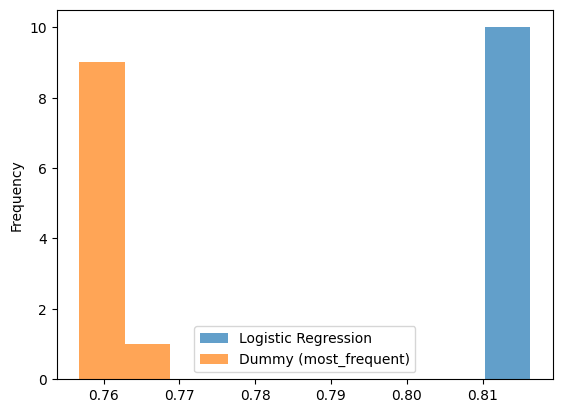

In [10]:
scores_df.plot.hist(
    bins=10,
    alpha=0.7
)


Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [ ]:
# Write your code here.